**Task 4: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

<ipython-input-5-9cacb177e384>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2', order=valid_sentiments)


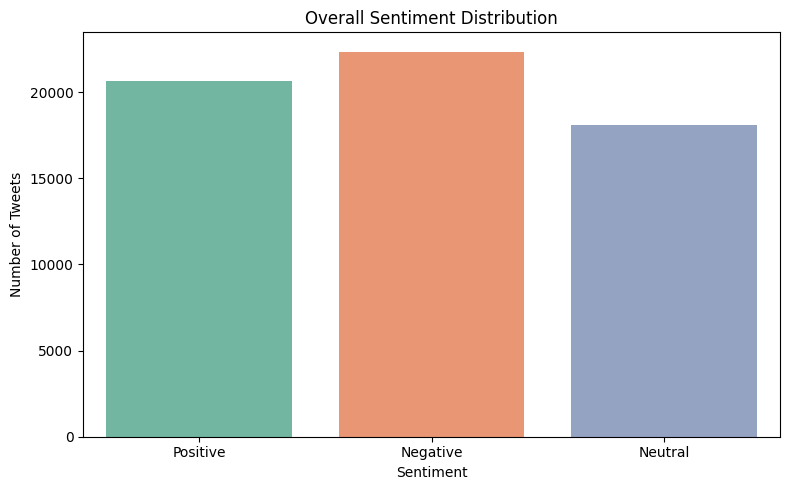

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset with column names
df = pd.read_csv("/content/twitter_sentiment_analysis.csv", names=["id", "entity", "sentiment", "text"], encoding='latin-1')

# Clean dataset: drop missing values and standardize sentiment
df.dropna(subset=["text", "entity", "sentiment"], inplace=True)
df['sentiment'] = df['sentiment'].str.capitalize()
valid_sentiments = ['Positive', 'Negative', 'Neutral']
df = df[df['sentiment'].isin(valid_sentiments)]

# Display overall sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='Set2', order=valid_sentiments)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

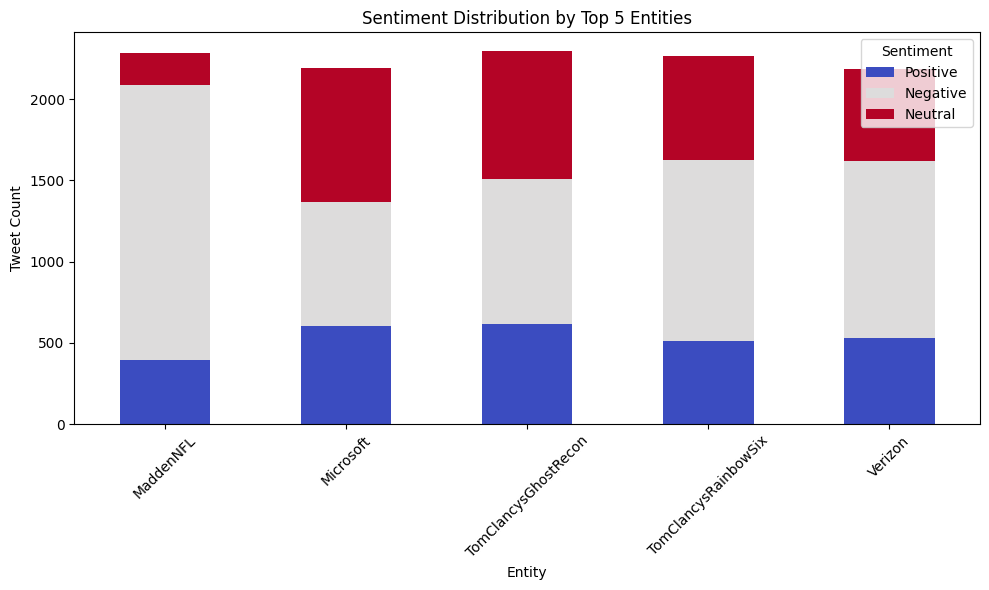

In [6]:
# Top 5 entities by tweet count
top_entities = df['entity'].value_counts().head(5).index

# Sentiment count per top entity
entity_sentiment = df[df['entity'].isin(top_entities)].groupby(['entity', 'sentiment']).size().unstack().fillna(0)

# Plot sentiment distribution for top entities
entity_sentiment = entity_sentiment[valid_sentiments]  # Ensure consistent order
entity_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Sentiment Distribution by Top 5 Entities')
plt.xlabel('Entity')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()